In [1]:
import jax
import jax.numpy as jnp
import json

import matplotlib.pyplot as plt

In [33]:
# runs = range(10655899, 10655910)
# for run in runs:
#   with open(f"output/runs/{run}/metrics.json", "r") as f:
#       metrics = json.load(f)
#       plt.plot(metrics["our_regret"], label="Our Regret")
#       plt.plot(metrics["ts_regret"], label="TS Regret")
#       plt.legend()
#       plt.title(run)
#       plt.show()

BernoulliTS: 8.459569931030273
softelim: 6.274069786071777


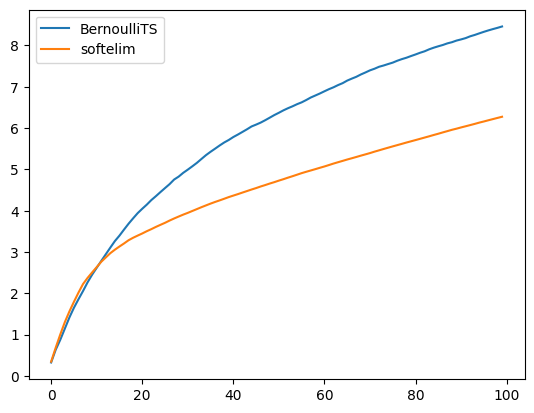

In [14]:
with open(f"output/runs/curvette_mucinogen/metrics.json", "r") as f:
      metrics = json.load(f)
      for name, metric in metrics.items():
        plt.plot(metric, label=name)
        print(f'{name}: {metric[-1]}')
      plt.legend()
      # plt.title(run)
      plt.show()